## Визуализация сообществ

In [1]:
import urllib
import networkx as nx
from networkx.algorithms import community
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
%matplotlib inline
from collections import Counter


from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community import label_propagation_communities
from community import community_louvain

In [3]:
G = nx.Graph()
G = nx.read_gexf('friends_groups_end.gexf')

print("Number of nodes in a graph: ", len(G.nodes()))
print("Number of edges in a graph: ", len(G.edges()))

components = list(nx.connected_components(G))
print("Number of connected components in a graph: ", len(components))

Number of nodes in a graph:  133
Number of edges in a graph:  413
Number of connected components in a graph:  1


In [4]:
def showCommunities(G, communities, name):
    pos = nx.spring_layout(G)
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
    plt.figure(figsize = (20, 20))
    plt.title(name, fontsize = 20)
    aux = 0
    for community in communities:
        #sizes =[350  if node in seeds else 100 for node in community]
        nx.draw_networkx_nodes(G, pos, community, node_size = 150, node_color = colors[aux])
        nx.draw_networkx_labels(G, pos, font_size = 12, font_color = 'black')
        aux = aux + 1
    nx.draw_networkx_edges(G, pos, alpha = 0.5, edge_color = 'darkgrey')
    plt.show(block = True)

In [5]:
def detect_communities_louvain(G):
    partition = community_louvain.best_partition(G)
    communities = list()
    for com in set(partition.values()) :
        list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
        communities.append(sorted(list_nodes))
    return sorted(communities)

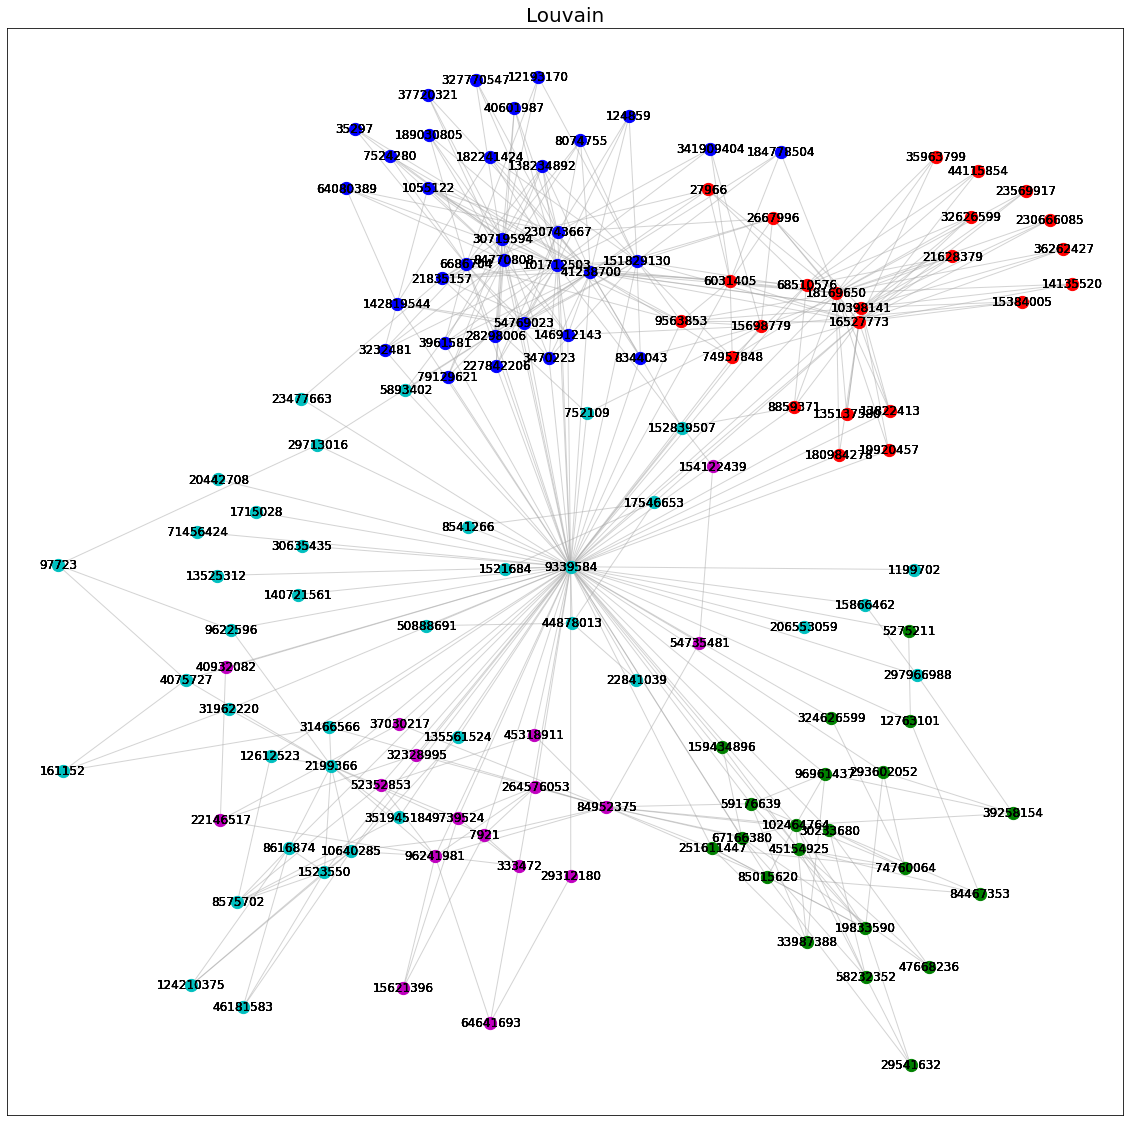

In [6]:
lou = detect_communities_louvain(G)
showCommunities(G, lou, 'Louvain')

## Матрицы

In [10]:
import scipy.spatial as spt

In [11]:
G2 = nx.read_gexf('friends_groups_end.gexf')

In [12]:
def plotDist(A):
    
    f, ax = plt.subplots(2, 2, figsize=(10,10))
    ax[0, 0].imshow(A, cmap = 'Greys', interpolation = 'None')
    ax[0, 0].set_title('Adjacency Matrix')
    
    D = np.corrcoef(A)
    ax[1, 0].imshow(D, cmap = 'Greys', interpolation = 'None')
    ax[1, 0].set_title('Correlation coeff.')
    
    dVec = spt.distance.pdist(A, metric = 'euclidean')
    D = spt.distance.squareform(dVec)
    ax[0, 1].imshow(D, cmap = 'Greys', interpolation = 'None')
    ax[0, 1].set_title('Euclidean Dist.')
    
    dVec = spt.distance.pdist(A, metric = 'cosine')
    D = spt.distance.squareform(dVec)
    ax[1, 1].imshow(D, cmap = 'Greys', interpolation = 'None')
    ax[1, 1].set_title('Cosine Dist.')

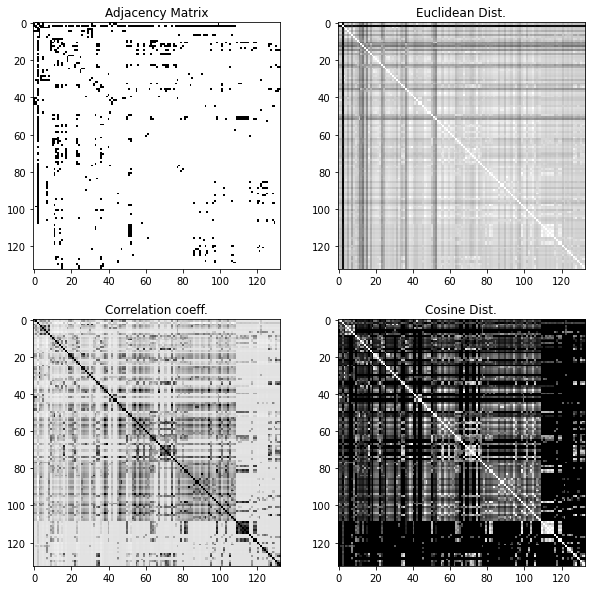

In [13]:
A = nx.to_numpy_matrix(G2, dtype = int)
A = np.asarray(A)

plotDist(A)

## Кластеринг

In [14]:
from sklearn.cluster import DBSCAN

In [15]:
matrix = nx.to_numpy_matrix(G2, dtype = int)
matrix

matrix([[0, 1, 1, ..., 0, 0, 0],
        [1, 0, 1, ..., 0, 0, 0],
        [1, 1, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [16]:
dbs = DBSCAN(eps = 1.7, min_samples = 2).fit(matrix)
dbs
dbs.labels_

array([-1, -1, -1,  0,  1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  2,
       -1, -1,  2,  2,  2,  3, -1, -1, -1,  2,  2,  2,  0, -1, -1,  2, -1,
       -1,  4, -1, -1,  2,  2, -1, -1, -1,  5,  5, -1,  2,  2,  2,  2, -1,
       -1, -1,  2,  2, -1,  2,  2,  2,  2,  2,  2,  2, -1, -1, -1, -1,  2,
        2,  2,  2, -1,  2,  2,  2,  2, -1, -1,  2,  2,  2,  2,  2,  2,  2,
        2, -1,  2,  2, -1,  2,  2,  6, -1,  2,  4, -1, -1,  2,  2,  2, -1,
        2,  2,  2,  4,  6,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1, -1,  2,
        2, -1, -1, -1,  2,  2, -1,  2,  4, -1, -1,  3,  4,  4])

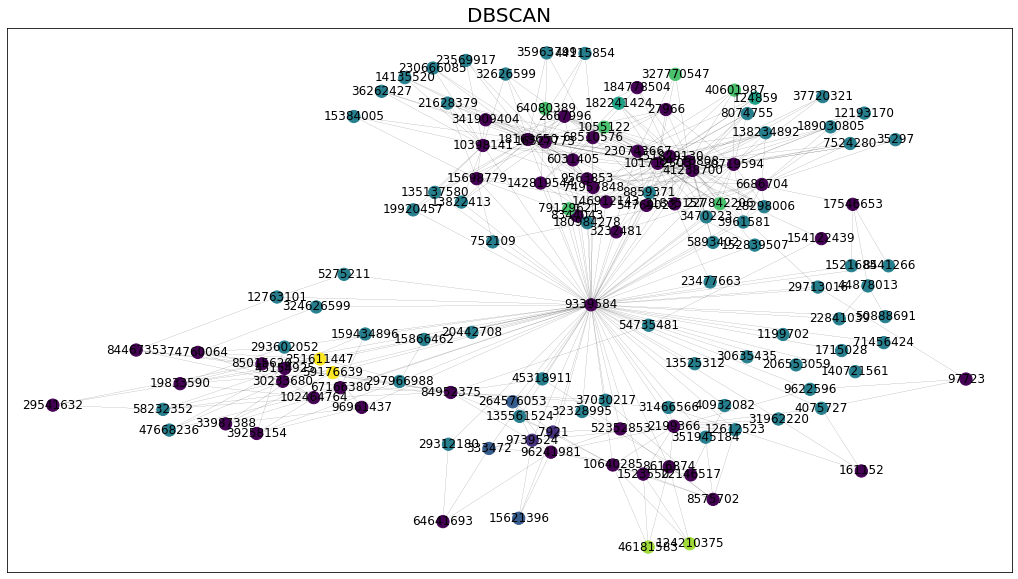

Number of clusters:  7


In [17]:
plt.figure(figsize = (18, 10))
nx.draw_networkx(G2, node_color = dbs.labels_, node_size = 150, width = 0.1)
plt.title('DBSCAN', fontsize = 20)
plt.show(block = True)
print('Number of clusters: ', max(dbs.labels_)-min(dbs.labels_))